In [1]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt, ticker as mticker
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import glob

mpl.rcParams['text.usetex']=True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
plt.rcParams.update({'font.size': 20})
mpl.rcParams["legend.framealpha"] = 1.0
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams["figure.figsize"] = [7.5, 4.5]

In [2]:
Data_1_muon = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Data_MadGraph_Muons_1.csv', sep=',')
Data_muon = pd.concat([Data_1_muon], axis=0)

In [3]:
# $\mathcal{B}_1$ -> 16043 (in xsec data) 50027 (in full data) (Card done)
# $\mathcal{B}_2$ -> 3526 (in xsec data) 10284 (in full data) (Card done)
# $\mathcal{B}_3$ -> 1716 (in xsec data) 5077 (in full data) (Card done)
# $\mathcal{B}_4$ -> 756 (in xsec data) 940 (in full data) (Card done)
# $\mathcal{B}_5$ -> 3691 (in xsec data) 10493 (in full data) (Card done)
# $\mathcal{B}_6$ -> 195 (in xsec data) 237 (in full data) (Card done)
# $\mathcal{B}_7$ -> 3677 (in xsec data) 10473 (in full data) (Card done)


# Cross-section plots

In [4]:
Data_1p5TeV = Data_muon.iloc[[16043]]
Data_2p5TeV = Data_muon.iloc[[3526]]
Data_3p5TeV = Data_muon.iloc[[1716]]
Data_4p5TeV = Data_muon.iloc[[756]]
Data_5p5TeV = Data_muon.iloc[[3691]]
Data_6p5TeV = Data_muon.iloc[[195]]
Data_7p5TeV = Data_muon.iloc[[3677]]

# Data_1p5TeV = Data_muon.iloc[[2312]]
# Data_2p5TeV = Data_muon.iloc[[2096]]
# Data_3p5TeV = Data_muon.iloc[[1703]]
# Data_4p5TeV = Data_muon.iloc[[3824]]
# Data_5p5TeV = Data_muon.iloc[[1877]]
# Data_6p5TeV = Data_muon.iloc[[2045]]
# Data_7p5TeV = Data_muon.iloc[[5110]]

In [5]:
Data_3p5TeV['xsec_TChannel (fb)']

1716    3.3454
Name: xsec_TChannel (fb), dtype: float64

# Muon cross-sections

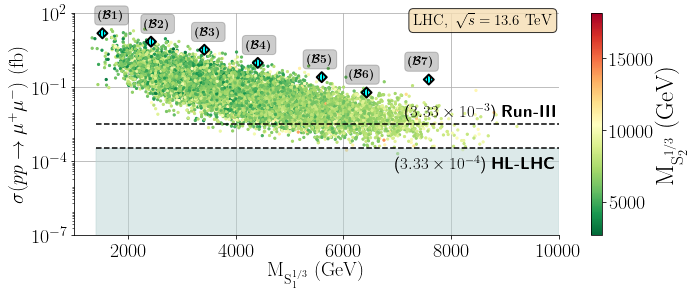

In [6]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data_muon['mS1']
ys = Data_muon['xsec_TChannel (fb)']
zs = Data_muon['mS2']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S^{1/3}_2}~(GeV)}$', fontsize=25)

### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(7150,1.9*run_III,'({Xsec})~\\textbf{{Run-III}}'.format(Xsec = run_III_xsec),fontsize=17)
plt.plot(xline,sen_III,'--k')

### HL-LHC sensitivity line ###
N = 1000
run_HL = 1/3000
sen_HL = run_HL*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_HL_xsec = ("$"+str(f"{run_HL:.2e}").replace("e", "\\times 10^{")+"}$").replace("04", "4")

plt.text(6950,0.15*run_HL,'({Xsec})~\\textbf{{HL-LHC}}'.format(Xsec = run_HL_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_HL,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_HL,'--k')

#Benchmarks
plt.scatter(Data_1p5TeV['mS1'], Data_1p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_2p5TeV['mS1'], Data_2p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_3p5TeV['mS1'], Data_3p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_4p5TeV['mS1'], Data_4p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_5p5TeV['mS1'], Data_5p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_6p5TeV['mS1'], Data_6p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_7p5TeV['mS1'], Data_7p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)

plt.text(Data_1p5TeV['mS1']*0.95, Data_1p5TeV['xsec_TChannel (fb)']*4.0, r"$\bm{(\mathcal{B}1)}$", fontsize = 12, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text(Data_2p5TeV['mS1']*0.95, Data_2p5TeV['xsec_TChannel (fb)']*4.0, r"$\bm{(\mathcal{B}2)}$", fontsize = 12, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text(Data_3p5TeV['mS1']*0.95, Data_3p5TeV['xsec_TChannel (fb)']*4.0, r"$\bm{(\mathcal{B}3)}$", fontsize = 12, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text(Data_4p5TeV['mS1']*0.95, Data_4p5TeV['xsec_TChannel (fb)']*4.0, r"$\bm{(\mathcal{B}4)}$", fontsize = 12, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text(Data_5p5TeV['mS1']*0.95, Data_5p5TeV['xsec_TChannel (fb)']*4.0, r"$\bm{(\mathcal{B}5)}$", fontsize = 12, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text(Data_6p5TeV['mS1']*0.95, Data_6p5TeV['xsec_TChannel (fb)']*4.0, r"$\bm{(\mathcal{B}6)}$", fontsize = 12, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text(Data_7p5TeV['mS1']*0.95, Data_7p5TeV['xsec_TChannel (fb)']*4.0, r"$\bm{(\mathcal{B}7)}$", fontsize = 12, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))


props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.70, 0.95, '$\mathrm{{LHC}},~\sqrt{{s}} = 13.6~\mathrm{{TeV}}$', transform=plt.gca().transAxes, bbox=props, fontsize=15.)

plt.xlabel(r'$\mathrm{M_{S_1^{1/3}}~(GeV)}$')
plt.ylabel(r'$\sigma (pp\rightarrow \mu^+\mu^-)~\mathrm{(fb)}$')
plt.yscale('log')
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
#plt.xscale('log')
plt.ylim([1e-7, 100])
plt.xlim([1000, 10000])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mS2_muon.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mS2_muon.pdf', bbox_inches='tight', dpi=500.0)
#plt.show()


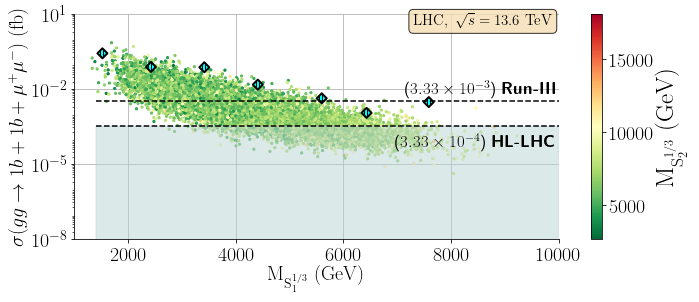

In [7]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data_muon['mS1']
ys = Data_muon['xsec_GluonSplit (fb)']
zs = Data_muon['mS2']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S^{1/3}_2}~(GeV)}$', fontsize=25)


### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(7150,1.9*run_III,'({Xsec})~\\textbf{{Run-III}}'.format(Xsec = run_III_xsec),fontsize=17)
plt.plot(xline,sen_III,'--k')

### HL-LHC sensitivity line ###
N = 1000
run_HL = 1/3000
sen_HL = run_HL*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_HL_xsec = ("$"+str(f"{run_HL:.2e}").replace("e", "\\times 10^{")+"}$").replace("04", "4")

plt.text(6950,0.15*run_HL,'({Xsec})~\\textbf{{HL-LHC}}'.format(Xsec = run_HL_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_HL,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_HL,'--k')

#Benchmarks
plt.scatter(Data_1p5TeV['mS1'], Data_1p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_2p5TeV['mS1'], Data_2p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_3p5TeV['mS1'], Data_3p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_4p5TeV['mS1'], Data_4p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_5p5TeV['mS1'], Data_5p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_6p5TeV['mS1'], Data_6p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_7p5TeV['mS1'], Data_7p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.70, 0.95, '$\mathrm{{LHC}},~\sqrt{{s}} = 13.6~\mathrm{{TeV}}$', transform=plt.gca().transAxes, bbox=props, fontsize=15.)


plt.xlabel(r'$\mathrm{M_{S^{1/3}_1}~(GeV)}$')
plt.ylabel(r'$\sigma (gg\rightarrow 1b + 1b + \mu^+\mu^-)~\mathrm{(fb)}$')
plt.yscale('log')
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
#plt.xscale('log')
plt.ylim([1e-8, 10])
plt.xlim([1000, 10000])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mS2_muon.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mS2_muon.pdf', bbox_inches='tight', dpi=500.0)

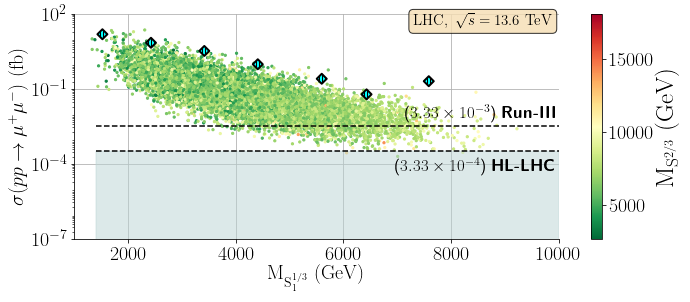

In [8]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data_muon['mS1']
ys = Data_muon['xsec_TChannel (fb)']
zs = Data_muon['mR']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S^{2/3}}~(GeV)}$', fontsize=25)

### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(7150,1.9*run_III,'({Xsec})~\\textbf{{Run-III}}'.format(Xsec = run_III_xsec),fontsize=17)
plt.plot(xline,sen_III,'--k')

### HL-LHC sensitivity line ###
N = 1000
run_HL = 1/3000
sen_HL = run_HL*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_HL_xsec = ("$"+str(f"{run_HL:.2e}").replace("e", "\\times 10^{")+"}$").replace("04", "4")

plt.text(6950,0.15*run_HL,'({Xsec})~\\textbf{{HL-LHC}}'.format(Xsec = run_HL_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_HL,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_HL,'--k')

#Benchmarks
plt.scatter(Data_1p5TeV['mS1'], Data_1p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_2p5TeV['mS1'], Data_2p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_3p5TeV['mS1'], Data_3p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_4p5TeV['mS1'], Data_4p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_5p5TeV['mS1'], Data_5p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_6p5TeV['mS1'], Data_6p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_7p5TeV['mS1'], Data_7p5TeV['xsec_TChannel (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.70, 0.95, '$\mathrm{{LHC}},~\sqrt{{s}} = 13.6~\mathrm{{TeV}}$', transform=plt.gca().transAxes, bbox=props, fontsize=15.)

plt.xlabel(r'$\mathrm{M_{S_1^{1/3}}~(GeV)}$')
plt.ylabel(r'$\sigma (pp\rightarrow \mu^+\mu^-)~\mathrm{(fb)}$')
plt.yscale('log')
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
#plt.xscale('log')
plt.ylim([1e-7, 100])
plt.xlim([1000, 10000])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mR_muon.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mR_muon.pdf', bbox_inches='tight', dpi=500.0)



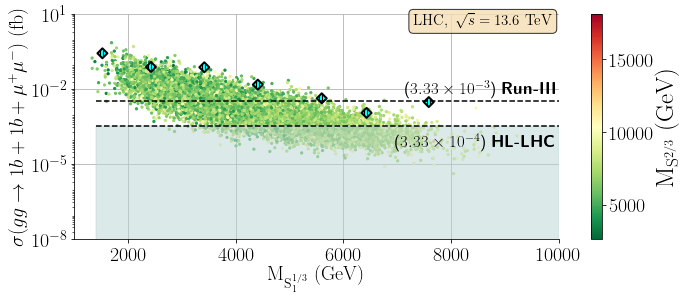

In [9]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data_muon['mS1']
ys = Data_muon['xsec_GluonSplit (fb)']
zs = Data_muon['mR']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S^{2/3}}~(GeV)}$', fontsize=25)


### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(7150,1.9*run_III,'({Xsec})~\\textbf{{Run-III}}'.format(Xsec = run_III_xsec),fontsize=17)
plt.plot(xline,sen_III,'--k')

### HL-LHC sensitivity line ###
N = 1000
run_HL = 1/3000
sen_HL = run_HL*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_HL_xsec = ("$"+str(f"{run_HL:.2e}").replace("e", "\\times 10^{")+"}$").replace("04", "4")

plt.text(6950,0.15*run_HL,'({Xsec})~\\textbf{{HL-LHC}}'.format(Xsec = run_HL_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_HL,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_HL,'--k')

#Benchmarks
plt.scatter(Data_1p5TeV['mS1'], Data_1p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_2p5TeV['mS1'], Data_2p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_3p5TeV['mS1'], Data_3p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_4p5TeV['mS1'], Data_4p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_5p5TeV['mS1'], Data_5p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_6p5TeV['mS1'], Data_6p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)
plt.scatter(Data_7p5TeV['mS1'], Data_7p5TeV['xsec_GluonSplit (fb)'], marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.70, 0.95, '$\mathrm{{LHC}},~\sqrt{{s}} = 13.6~\mathrm{{TeV}}$', transform=plt.gca().transAxes, bbox=props, fontsize=15.)


plt.xlabel(r'$\mathrm{M_{S^{1/3}_1}~(GeV)}$')
plt.ylabel(r'$\sigma (gg\rightarrow 1b + 1b + \mu^+\mu^-)~\mathrm{(fb)}$')
plt.yscale('log')
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
#plt.xscale('log')
plt.ylim([1e-8, 10])
plt.xlim([1000, 10000])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mR_muon.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mR_muon.pdf', bbox_inches='tight', dpi=500.0)

# Kinematic and angular distributions plots

In [10]:
LQ_Point1 = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_100GeV.csv', sep=',')
LQ_Point2 = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_500GeV.csv', sep=',')
LQ_Point3 = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_1TeV.csv', sep=',')
LQ_Point4 = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_1500GeV.csv', sep=',')
LQ_Point5 = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_2TeV.csv', sep=',')
LQ_Point6 = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_3TeV.csv', sep=',')
LQ_Point7 = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_4TeV.csv', sep=',')

In [11]:
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{inputenc}'
plt.rcParams.update({'font.size': 75})

In [12]:
#Drop weight. For plotting, the distributions will be normalised 
#To use weights and to get the actual number of events/bin one must use the plt.hist method of the dataframe
#and then pass the weights to the weight option (i.e as weights = LQ_point1['xs_weight']*1000). This is used for
#the calculation of the p-values, but in here we only want to look at the plots so it does not matter
Vars = ['xs_weight']
LQ_Point1 = LQ_Point1.drop(Vars,axis=1)
LQ_Point2 = LQ_Point2.drop(Vars,axis=1)
LQ_Point3 = LQ_Point3.drop(Vars,axis=1)
LQ_Point4 = LQ_Point4.drop(Vars,axis=1)
LQ_Point5 = LQ_Point5.drop(Vars,axis=1)
LQ_Point6 = LQ_Point6.drop(Vars,axis=1)
LQ_Point7 = LQ_Point7.drop(Vars,axis=1)

# Draw all observables

In [13]:
Vars = list(LQ_Point5)

labels = [r'$p_T(\mu^-)~(\mathrm{GeV})$', r'$p_T(\mu^+)~(\mathrm{GeV})$', r'$E(\mu^-)~(\mathrm{GeV})$',
          r'$E(\mu^-)~(\mathrm{GeV})$', r'$\eta(\mu^-)$', r'$\eta(\mu^+)$', r'$\phi(\mu^-)$',
          r'$\phi(\mu^+)$', r'$\Delta R (\mu^-, \mu^+)$', r'$\Delta \phi (\mu^-, \mu^+)$',
          r'$\Delta \theta (\mu^-, \mu^+)$', r'$\Delta \eta (\mu^+, \mu^-)$', r'$\cos (\theta_{\mu^+, \mu^-})$',
          r'$p^{\mathrm{CM}}_T(\mu^-)~\mathrm{GeV}$', r'$p^{\mathrm{CM}}_T(\mu^+)~\mathrm{GeV}$',
          r'$E^{\mathrm{CM}}(\mu^-)~\mathrm{GeV}$', r'$E^{\mathrm{CM}}(\mu^-)~\mathrm{GeV}$',
          r'$\eta^{\mathrm{CM}}(\mu^-)$', r'$\eta^{\mathrm{CM}}(\mu^+)$', r'$\phi^{\mathrm{CM}}(\mu^-)$',
          r'$\phi^{\mathrm{CM}}(\mu^+)$', r'$\Delta R^{\mathrm{CM}} (\mu^-, \mu^+)$', r'$\Delta \phi^{\mathrm{CM}} (\mu^-, \mu^+)$',
          r'$\Delta \theta^{\mathrm{CM}} (\mu^-, \mu^+)$', r'$\Delta \eta^{\mathrm{CM}} (\mu^+, \mu^-)$',
          r'$\cos (\theta^{\mathrm{CM}}_{\mu^+, \mu^-})$', r'$b_2^{\mu^+, \mu^-}$', r'$b_4^{\mu^+, \mu^-}$',
          r'$M(\mu^+, \mu^-)~(\mathrm{GeV})$', r'$\cos (\theta^{R-axis}_{\mu^-})$', r'$\cos (\theta^{R-axis}_{\mu^+})$',
          r'$\cos (\theta^{N-axis}_{\mu^-})$', r'$\cos (\theta^{N-axis}_{\mu^+})$']

labels_plots = [r"100 GeV LQ", r"500 GeV LQ", r"1 TeV LQ", r"1.5 TeV LQ", r"2 TeV LQ", r"3 TeV LQ", r"4 TeV LQ"]

/home/felipe/anaconda3/envs/MadGraph-py3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/felipe/anaconda3/envs/MadGraph-py3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/felipe/anaconda3/envs/MadGraph-py3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/felipe/anaconda3/envs/MadGraph-py3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


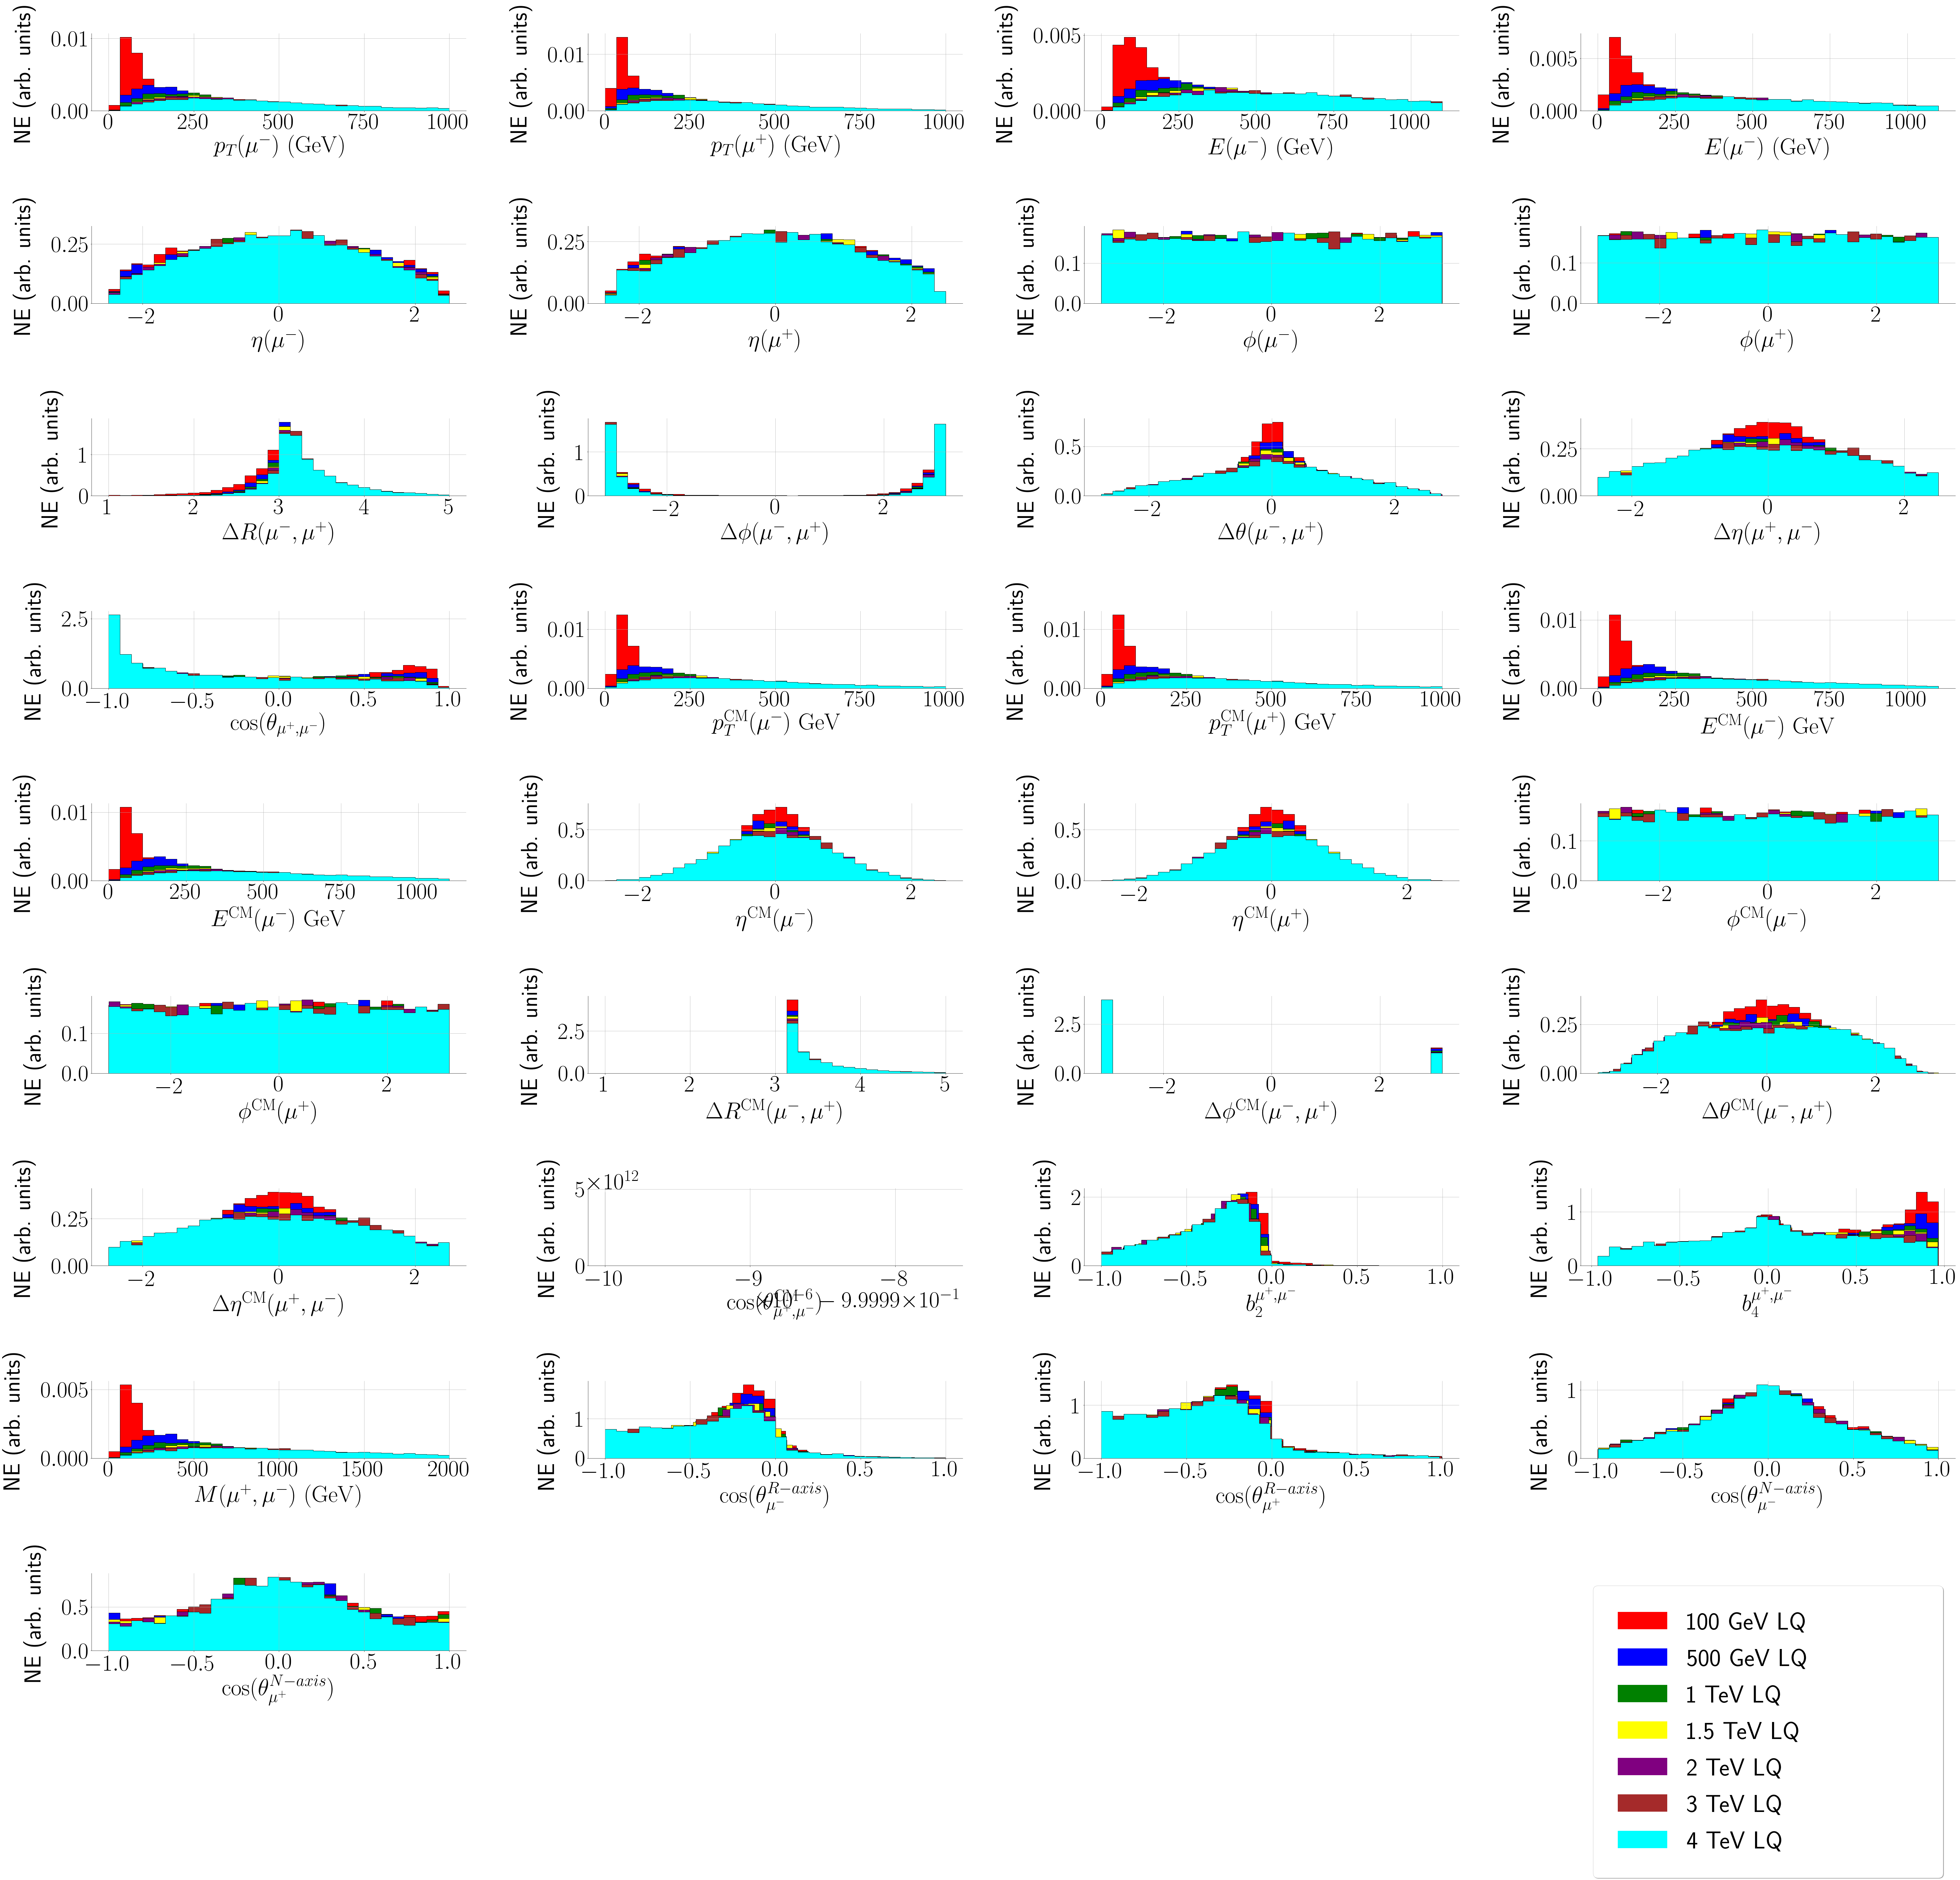

In [14]:
num_cols=4
N=len(labels)+1
fig, axes = plt.subplots(nrows=9,ncols=num_cols,figsize=(90,90))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

for i, feature in enumerate(labels):

    var_Point1 = LQ_Point1[Vars[i]]
    var_Point2 = LQ_Point2[Vars[i]]
    var_Point3 = LQ_Point3[Vars[i]]
    var_Point4 = LQ_Point4[Vars[i]]
    var_Point5 = LQ_Point5[Vars[i]]
    var_Point6 = LQ_Point6[Vars[i]]
    var_Point7 = LQ_Point7[Vars[i]]
    
    if feature.__contains__('p_T'):
        var_Point1.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled")
        var_Point7.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    elif feature.__contains__('p^{\mathrm{CM}}'):
        var_Point1.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled")
        var_Point7.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    elif feature.__contains__('E'):
        var_Point1.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled")
        var_Point7.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    elif feature.__contains__('\Delta R'):
        var_Point1.hist(ax=axes[i],range=(1, 5), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(1, 5), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(1, 5), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(1, 5), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(1, 5), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(1, 5), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled")
        var_Point7.hist(ax=axes[i],range=(1, 5), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    elif feature.__contains__('\eta'):
        var_Point1.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled") 
        var_Point7.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    elif feature.__contains__('M(\mu^+, \mu^-)'):
        var_Point1.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled") 
        var_Point7.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    else:
        var_Point1.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled")
        var_Point7.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    
    axes[i].set_xlabel(feature, labelpad = 10.0)
    axes[i].set_ylabel("NE (arb. units)", labelpad = 50.0)

axes[-1].hist([], color='red',    histtype="stepfilled", label=labels_plots[0])
axes[-1].hist([], color='blue',   histtype="stepfilled", label=labels_plots[1])
axes[-1].hist([], color='green',  histtype="stepfilled", label=labels_plots[2])
axes[-1].hist([], color='yellow', histtype="stepfilled", label=labels_plots[3])
axes[-1].hist([], color='purple', histtype="stepfilled", label=labels_plots[4])
axes[-1].hist([], color='brown',  histtype="stepfilled", label=labels_plots[5])
axes[-1].hist([], color='cyan',   histtype="stepfilled", label=labels_plots[6])

axes[-1].legend(loc = 'best', mode="expand", framealpha = 1.0 ,shadow=True, borderpad = 1.0, prop = {'size': 80})
axes[-1].axis('off') 
axes[-2].axis('off')     
axes[-3].axis('off')     
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/All_plots_ScanMass.pdf')
#plt.show()

# Draw only a selection of distributions for mass distributions

In [15]:
Vars = ['E_l1', 'pt_l1', 'eta_l1', 
        'E_l1_CM', 'pt_l1_CM', 
        'M_l1l2', 'DeltaTheta_l1l2', 'DeltaEta_l1l2',
        'b4_l1l2']

labels = [r'$E(\mu^-)~(\mathrm{GeV})$', r'$p_T(\mu^-)~(\mathrm{GeV})$', r'$\eta (\mu^-)$',
          r'$E^{\mathrm{CM}}(\mu^-)~\mathrm{GeV}$', r'$p^{\mathrm{CM}}_T(\mu^-)~\mathrm{GeV}$',
          r'$M(\mu^+, \mu^-)~(\mathrm{GeV})$', r'$\Delta \theta (\mu^-, \mu^+)$', r'$\Delta \eta (\mu^+, \mu^-)$',
          r'$b_4^{\mu^+, \mu^-}$'
         ]

labels_plots = [r"100 GeV LQ", r"500 GeV LQ", r"1 TeV LQ", r"1.5 TeV LQ", r"2 TeV LQ", r"3 TeV LQ", r"4 TeV LQ"]

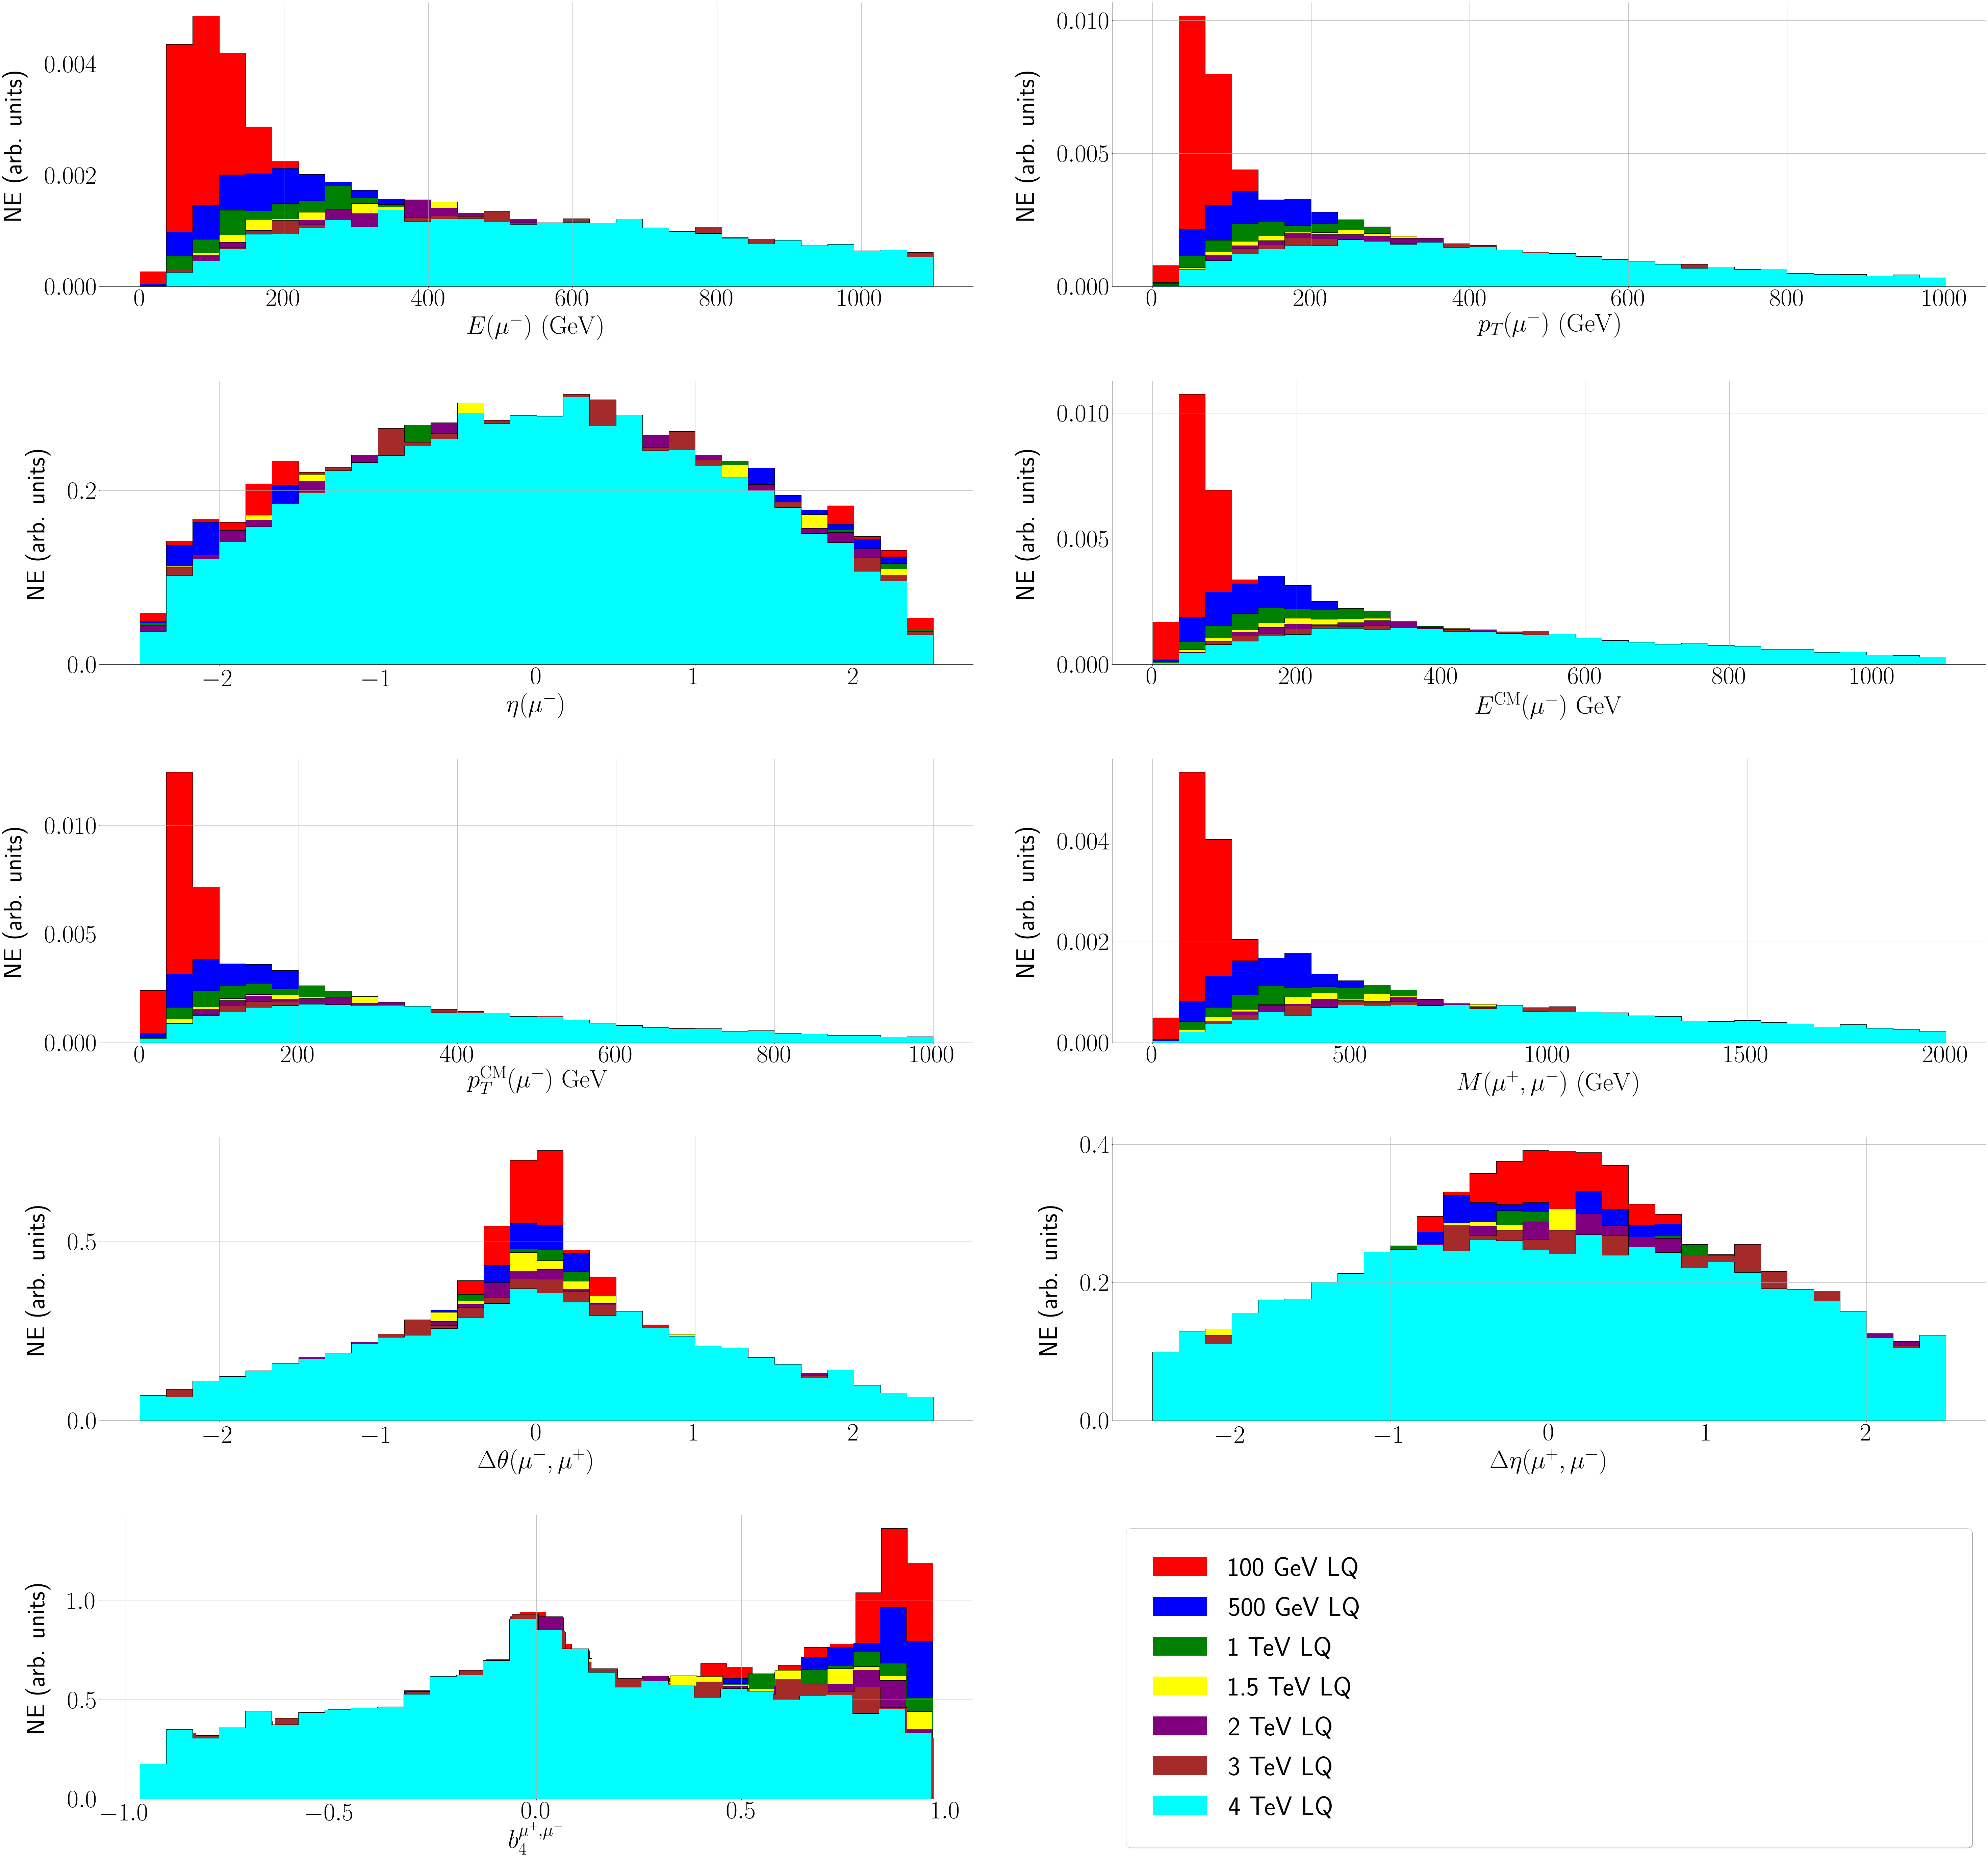

In [16]:
num_cols=4
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(85,85))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
plt.rcParams.update({'font.size': 115})
for i, feature in enumerate(labels):

    var_Point1 = LQ_Point1[Vars[i]]
    var_Point2 = LQ_Point2[Vars[i]]
    var_Point3 = LQ_Point3[Vars[i]]
    var_Point4 = LQ_Point4[Vars[i]]
    var_Point5 = LQ_Point5[Vars[i]]
    var_Point6 = LQ_Point6[Vars[i]]
    var_Point7 = LQ_Point7[Vars[i]]
    
    if feature.__contains__('p_T'):
        var_Point1.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled")
        var_Point7.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    elif feature.__contains__('p^{\mathrm{CM}}'):
        var_Point1.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled")
        var_Point7.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    elif feature.__contains__('E'):
        var_Point1.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled")
        var_Point7.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    elif feature.__contains__('M(\mu^+, \mu^-)'):
        var_Point1.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled") 
        var_Point7.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")    
    elif feature.__contains__('eta'):
        var_Point1.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled") 
        var_Point7.hist(ax=axes[i],range=(-2.5, 2.5), bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    else:
        var_Point1.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='red',    histtype="stepfilled")
        var_Point2.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='blue',   histtype="stepfilled")
        var_Point3.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='green',  histtype="stepfilled")
        var_Point4.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='yellow', histtype="stepfilled")
        var_Point5.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='purple', histtype="stepfilled")
        var_Point6.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='brown',  histtype="stepfilled")
        var_Point7.hist(ax=axes[i], bins=30, density=True, edgecolor='black', color='cyan',   histtype="stepfilled")
    
    axes[i].set_xlabel(feature, labelpad = 10.0)
    axes[i].set_ylabel("NE (arb. units)", labelpad = 50.0)

    
#
axes[-1].hist([], color='red',    histtype="stepfilled", label=labels_plots[0])
axes[-1].hist([], color='blue',   histtype="stepfilled", label=labels_plots[1])
axes[-1].hist([], color='green',  histtype="stepfilled", label=labels_plots[2])
axes[-1].hist([], color='yellow', histtype="stepfilled", label=labels_plots[3])
axes[-1].hist([], color='purple', histtype="stepfilled", label=labels_plots[4])
axes[-1].hist([], color='brown',  histtype="stepfilled", label=labels_plots[5])
axes[-1].hist([], color='cyan',   histtype="stepfilled", label=labels_plots[6])
#
axes[-1].legend(loc = 'best', mode="expand", framealpha = 1.0 ,shadow=True, borderpad = 1.0, prop = {'size': 80})
axes[-1].legend(loc = 'best', mode="expand", framealpha = 1.0 ,shadow=True, borderpad = 1.0, prop = {'size': 80})
axes[-1].legend(loc = 'best', mode="expand", framealpha = 1.0 ,shadow=True, borderpad = 1.0, prop = {'size': 80})
axes[-1].axis('off') 
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/All_plots_ScanMass_Best.pdf')
#plt.show()

# Draw distributions signal and background. All observables

In [17]:
# Signal and backgrounds

path = "/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights"

all_Signal = glob.glob(path + "/LQ_Tchannel_1p5TeV.csv")
all_ttbar = glob.glob(path + "/ttbar_*.csv")
all_WW = glob.glob(path + "/WW_*.csv")
all_ZZ = glob.glob(path + "/ZZ_*.csv")
all_ZW = glob.glob(path + "/ZW_*.csv")
all_Zplusjets = glob.glob(path + "/Z_plus_jets_*.csv")

li_Signal = []
li_ttbar = []
li_WW = []
li_ZZ = []
li_ZW = []
li_Zplusjets = []

#Signal
for filename in all_Signal:
    df = pd.read_csv(filename, index_col=None, header=0)
    li_Signal.append(df)

Signal = pd.concat(li_Signal, axis=0, ignore_index=True)

#ttbar
for filename in all_ttbar:
    df = pd.read_csv(filename, index_col=None, header=0)
    li_ttbar.append(df)

ttbar = pd.concat(li_ttbar, axis=0, ignore_index=True)

#WW
for filename in all_WW:
    df = pd.read_csv(filename, index_col=None, header=0)
    li_WW.append(df)

WW = pd.concat(li_WW, axis=0, ignore_index=True)

#ZZ
for filename in all_ZZ:
    df = pd.read_csv(filename, index_col=None, header=0)
    li_ZZ.append(df)

ZZ = pd.concat(li_ZZ, axis=0, ignore_index=True)

#ZW
for filename in all_ZW:
    df = pd.read_csv(filename, index_col=None, header=0)
    li_ZW.append(df)

ZW = pd.concat(li_ZW, axis=0, ignore_index=True)

#Z plus jets
for filename in all_Zplusjets:
    df = pd.read_csv(filename, index_col=None, header=0)
    li_Zplusjets.append(df)

Z_plus_jets = pd.concat(li_Zplusjets, axis=0, ignore_index=True)

Diboson = pd.concat([WW, ZZ, ZW],axis=0)


In [18]:
#Drop variables
Vars = ['xs_weight']
Signal = Signal.drop(Vars,axis=1)
Z_plus_jets = Z_plus_jets.drop(Vars,axis=1)
ttbar = ttbar.drop(Vars,axis=1)
Diboson = Diboson.drop(Vars,axis=1)

In [19]:
Vars = list(Signal)[:-2]

labels = [r'$p_T(\mu^-)~(\mathrm{GeV})$', r'$p_T(\mu^+)~(\mathrm{GeV})$', r'$E(\mu^-)~(\mathrm{GeV})$',
          r'$E(\mu^-)~(\mathrm{GeV})$', r'$\eta(\mu^-)$', r'$\eta(\mu^+)$', r'$\phi(\mu^-)$',
          r'$\phi(\mu^+)$', r'$\Delta R (\mu^-, \mu^+)$', r'$\Delta \phi (\mu^-, \mu^+)$',
          r'$\Delta \theta (\mu^-, \mu^+)$', r'$\Delta \eta (\mu^+, \mu^-)$', r'$\cos (\theta_{\mu^+, \mu^-})$',
          r'$p^{\mathrm{CM}}_T(\mu^-)~\mathrm{GeV}$', r'$p^{\mathrm{CM}}_T(\mu^+)~\mathrm{GeV}$',
          r'$E^{\mathrm{CM}}(\mu^-)~\mathrm{GeV}$', r'$E^{\mathrm{CM}}(\mu^-)~\mathrm{GeV}$',
          r'$\eta^{\mathrm{CM}}(\mu^-)$', r'$\eta^{\mathrm{CM}}(\mu^+)$', r'$\phi^{\mathrm{CM}}(\mu^-)$',
          r'$\phi^{\mathrm{CM}}(\mu^+)$', r'$\Delta R^{\mathrm{CM}} (\mu^-, \mu^+)$', r'$\Delta \phi^{\mathrm{CM}} (\mu^-, \mu^+)$',
          r'$\Delta \theta^{\mathrm{CM}} (\mu^-, \mu^+)$', r'$\Delta \eta^{\mathrm{CM}} (\mu^+, \mu^-)$',
          r'$\cos (\theta^{\mathrm{CM}}_{\mu^+, \mu^-})$', r'$b_2^{\mu^+, \mu^-}$', r'$b_4^{\mu^+, \mu^-}$',
          r'$M(\mu^+, \mu^-)~(\mathrm{GeV})$', r'$\cos (\theta^{R-axis}_{\mu^-})$', r'$\cos (\theta^{R-axis}_{\mu^+})$',
          r'$\cos (\theta^{N-axis}_{\mu^-})$', r'$\cos (\theta^{N-axis}_{\mu^+})$']

labels_plots = [r"1.5 TeV LQ", r"$\mathrm{Z^0+jets}$", r"$t\overline{t}$", r"Diboson ($\mathrm{WW+WZ^0+Z^0Z^0}$)"]

/home/felipe/anaconda3/envs/MadGraph-py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


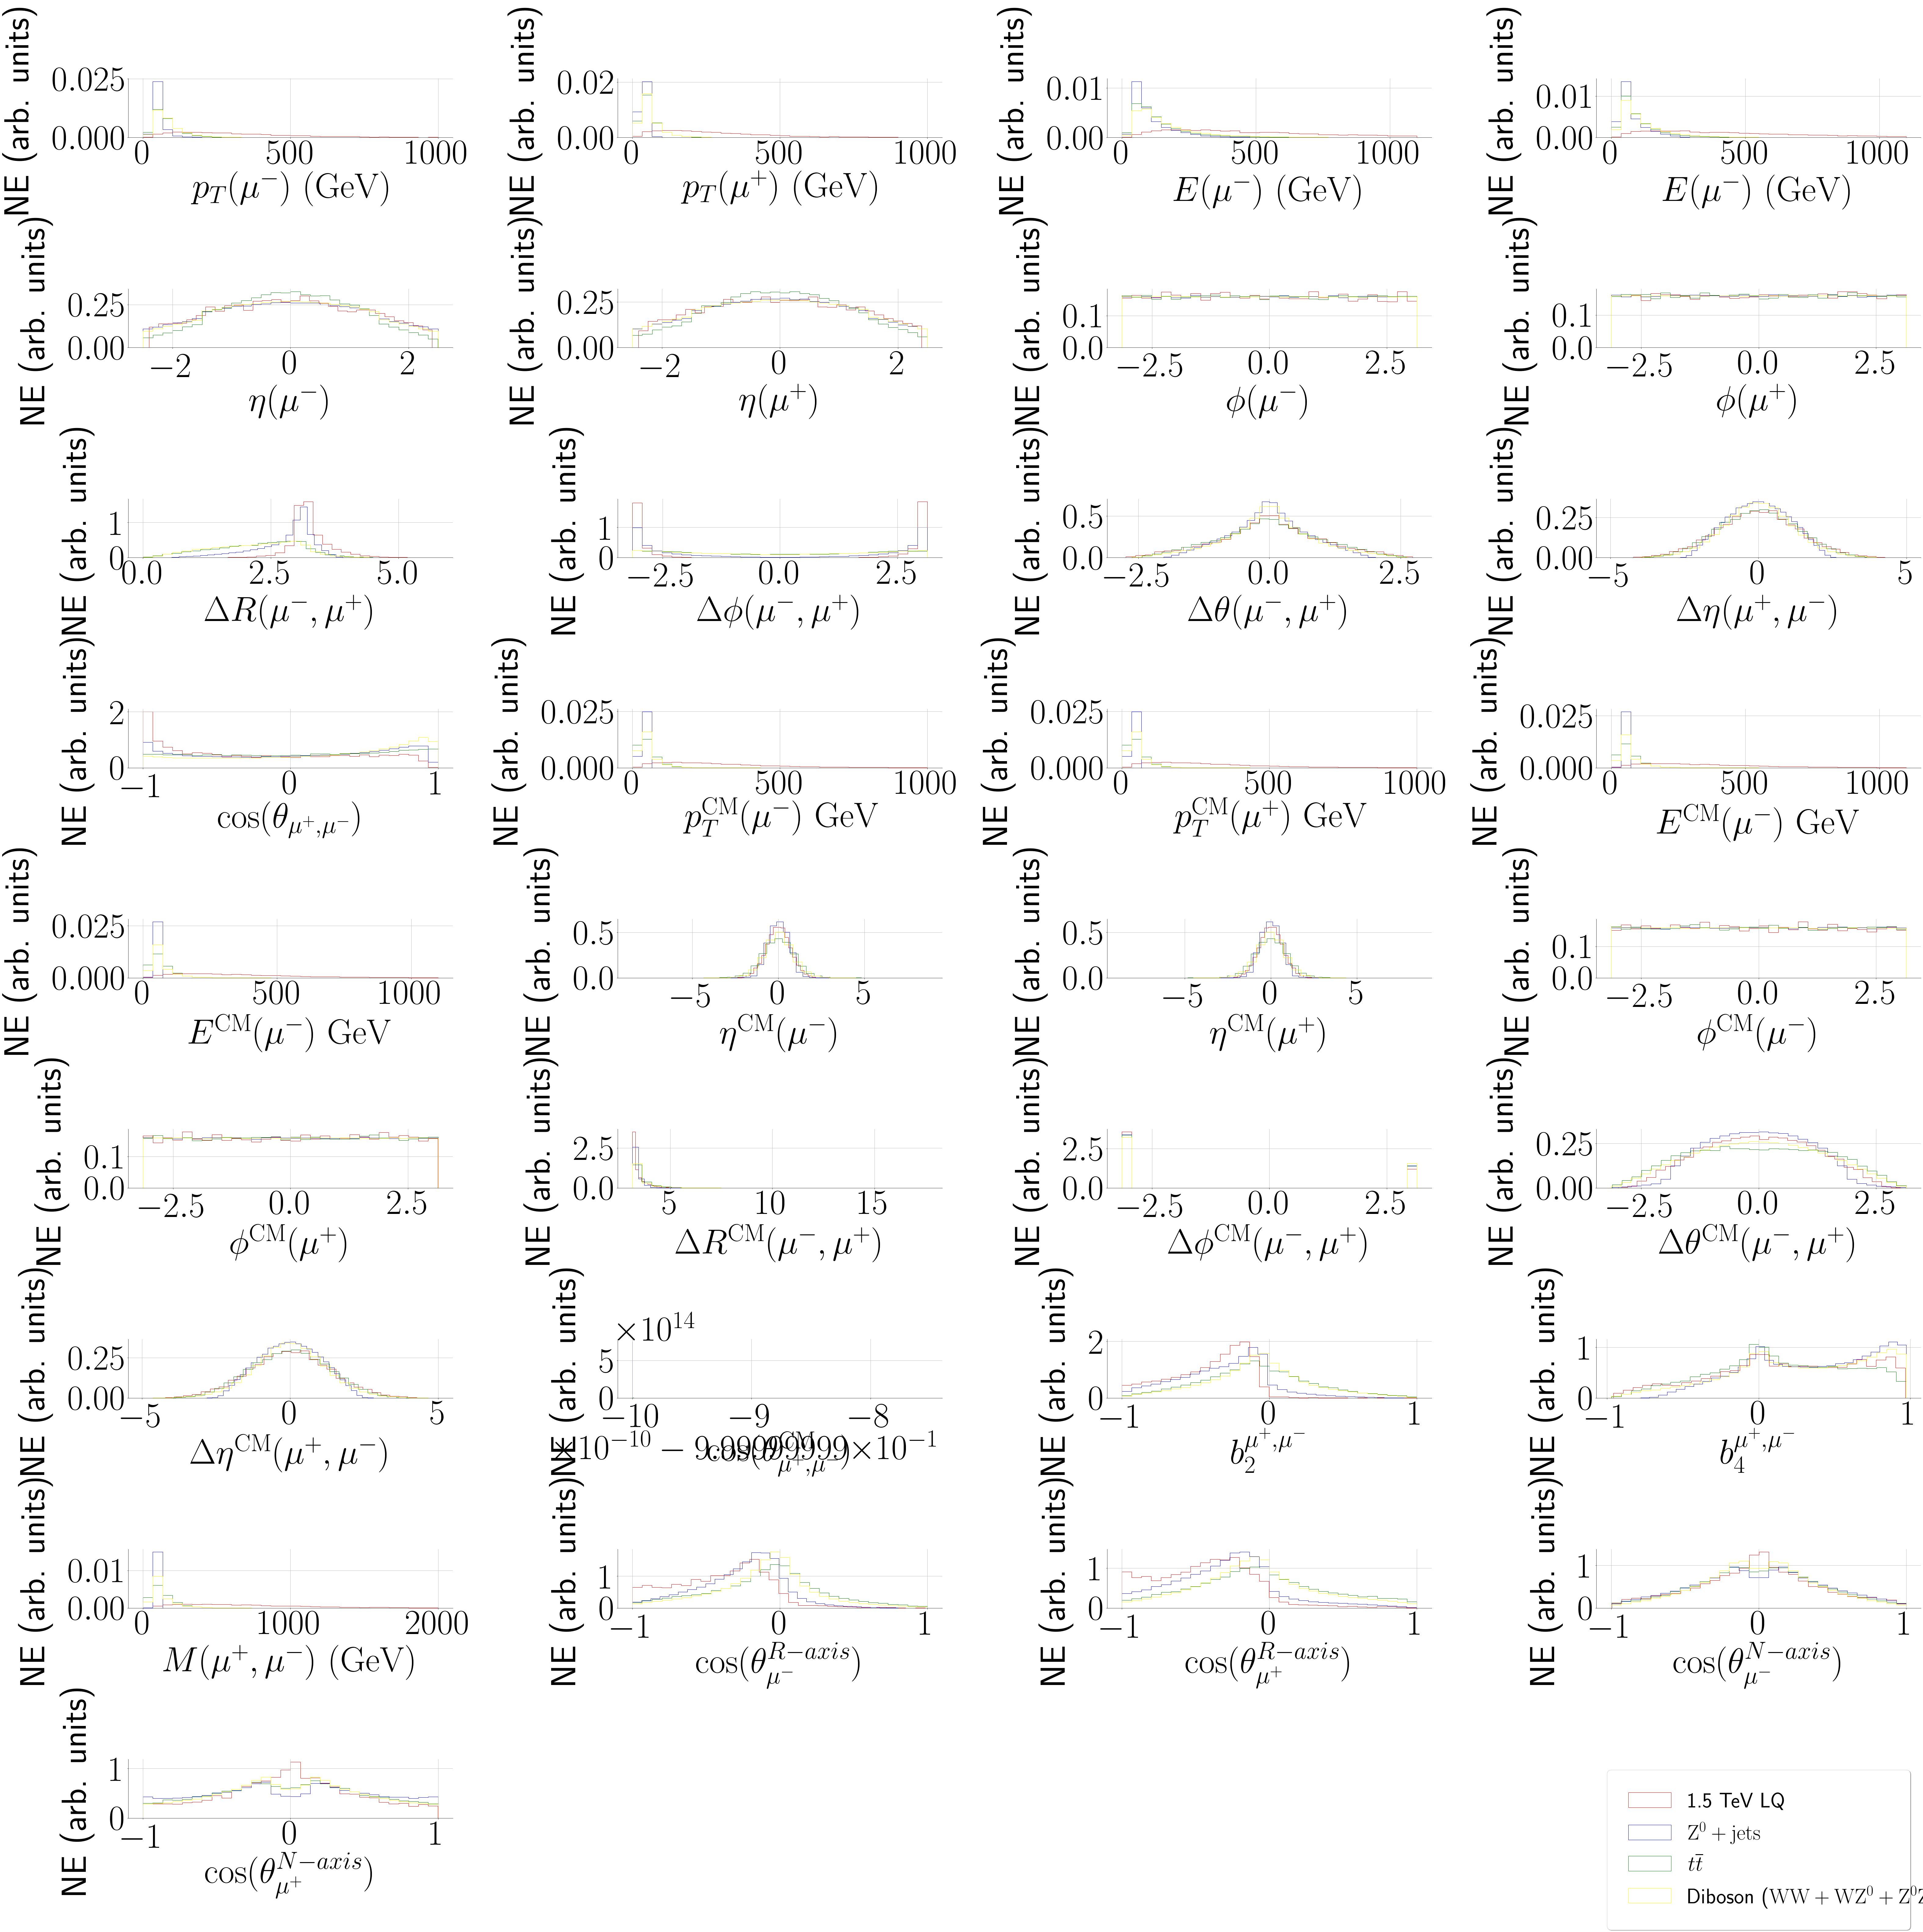

In [20]:
num_cols=4
fig, axes = plt.subplots(nrows=9,ncols=num_cols,figsize=(90,90))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

for i, feature in enumerate(labels):

    var_Point1 = Signal[Vars[i]]
    var_Point2 = Z_plus_jets[Vars[i]]
    var_Point3 = ttbar[Vars[i]]
    var_Point4 = Diboson[Vars[i]]

    if feature.__contains__('p_T'):
        var_Point1.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='yellow', color='yellow', histtype="step")
    elif feature.__contains__('p^{\mathrm{CM}}'):
        var_Point1.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='yellow', color='yellow', histtype="step")
    elif feature.__contains__('E'):
        var_Point1.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='yellow', color='yellow', histtype="step")
    elif feature.__contains__('M(\mu^+, \mu^-)'):
        var_Point1.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='yellow', color='yellow', histtype="step")
    else:
        var_Point1.hist(ax=axes[i], bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i], bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i], bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i], bins=30, density=True, edgecolor='yellow', color='yellow', histtype="step")
    
    axes[i].set_xlabel(feature, labelpad = 10.0)
    axes[i].set_ylabel("NE (arb. units)", labelpad = 50.0)

    
#
axes[-1].hist([], color='red',    histtype="step", label=labels_plots[0])
axes[-1].hist([], color='blue',   histtype="step", label=labels_plots[1])
axes[-1].hist([], color='green',  histtype="step", label=labels_plots[2])
axes[-1].hist([], color='yellow', histtype="step", label=labels_plots[3])
#
axes[-1].legend(loc = 'best', mode="expand", framealpha = 1.0 ,shadow=True, borderpad = 1.0, prop = {'size': 70})
axes[-1].axis('off') 
axes[-2].axis('off')     
axes[-3].axis('off')     
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/All_Backgrounds_plots.pdf')
plt.show()


# Draw only a selection of distributions for signal/background distributions

In [21]:
Vars = ['pt_l1', 'pt_l2', 'E_l1', 'E_l2', 'M_l1l2', 'pt_l1_CM',
        'E_l1_CM']

labels = [r'$p_T(\mu^-)~(\mathrm{GeV})$', r'$p_T(\mu^+)~(\mathrm{GeV})$', r'$E(\mu^-)~(\mathrm{GeV})$',
          r'$E(\mu^+)~(\mathrm{GeV})$', r'$M(\mu^+, \mu^-)~(\mathrm{GeV})$', 
          r'$p^{\mathrm{CM}}_T(\mu^-)~\mathrm{GeV}$',
          r'$E^{\mathrm{CM}}(\mu^-)~\mathrm{GeV}$']

labels_plots = [r"1.5 TeV LQ", r"$\mathrm{Z^0+jets}$", r"$t\overline{t}$", r"Diboson ($\mathrm{WW+WZ^0+Z^0Z^0}$)"]


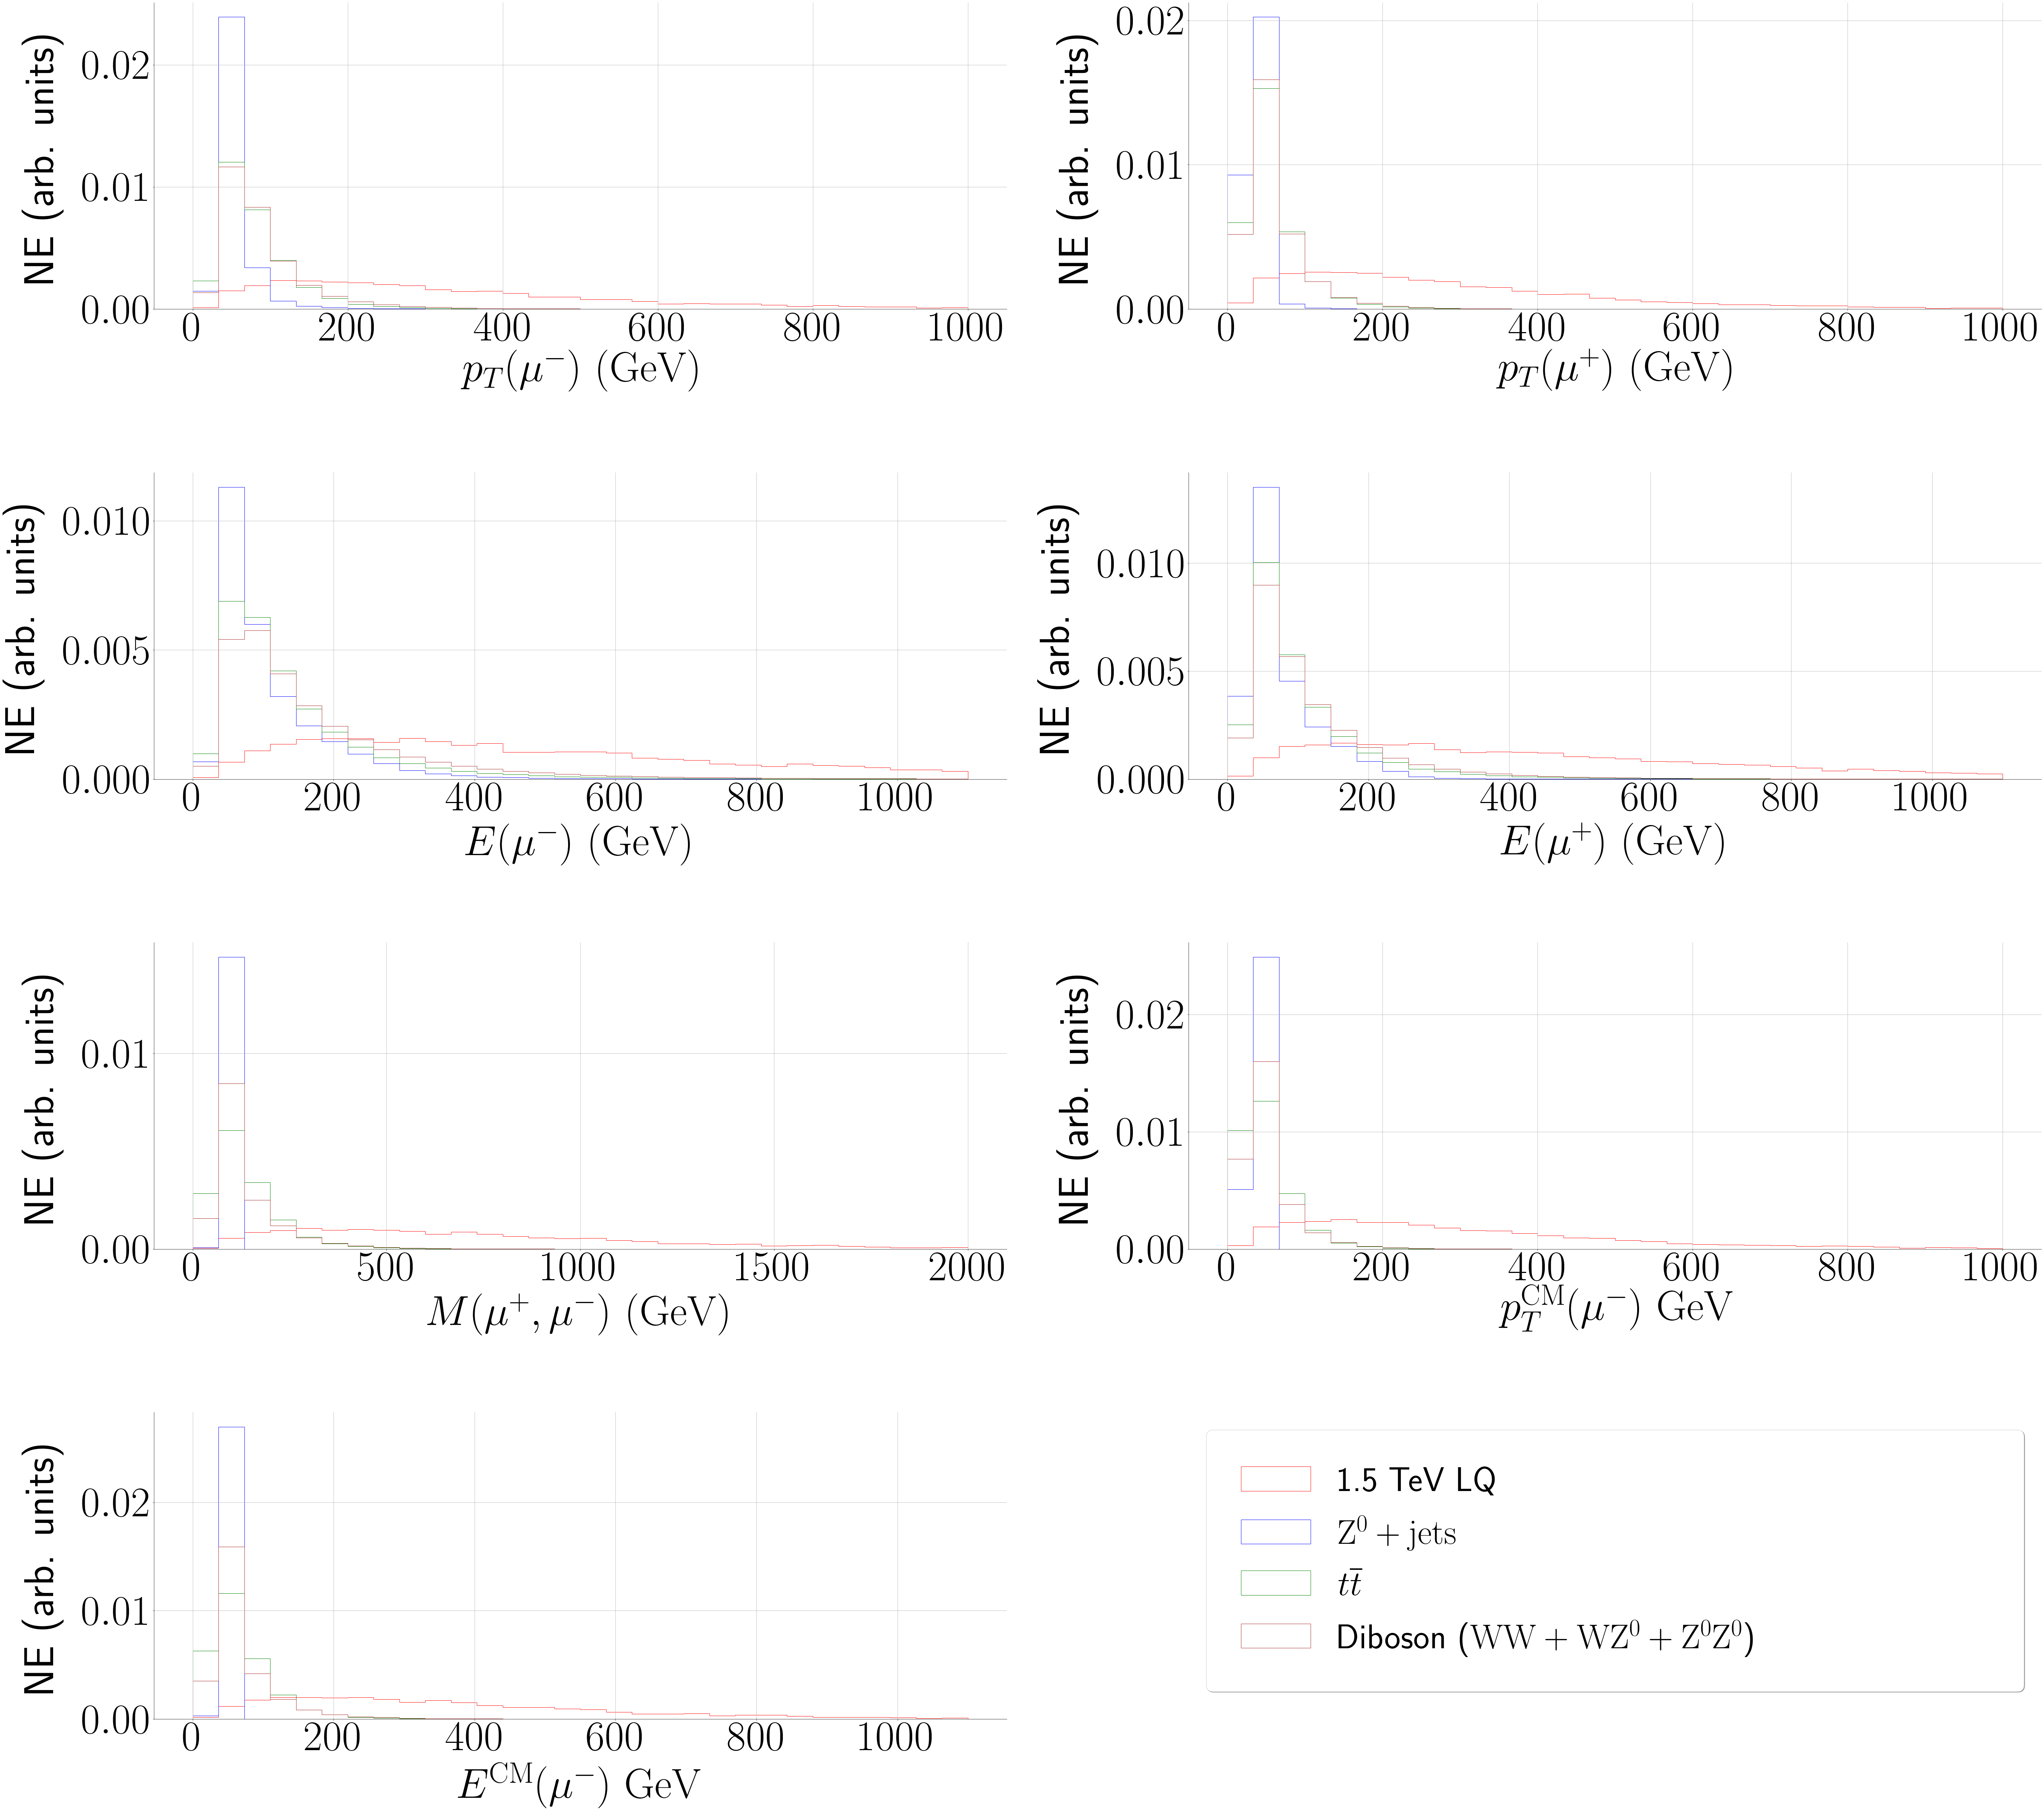

In [22]:

fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(80,75))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
plt.rcParams.update({'font.size': 105})

for i, feature in enumerate(labels):

    var_Point1 = Signal[Vars[i]]
    var_Point2 = Z_plus_jets[Vars[i]]
    var_Point3 = ttbar[Vars[i]]
    var_Point4 = Diboson[Vars[i]]

    if feature.__contains__('p_T'):
        var_Point1.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='brown', color='brown', histtype="step")
    elif feature.__contains__('p^{\mathrm{CM}}'):
        var_Point1.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i],range=(0, 1000), bins=30, density=True, edgecolor='brown', color='brown', histtype="step")
    elif feature.__contains__('E'):
        var_Point1.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i],range=(0, 1100), bins=30, density=True, edgecolor='brown', color='brown', histtype="step")
    elif feature.__contains__('M(\mu^+, \mu^-)'):
        var_Point1.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i],range=(0., 2000.), bins=30, density=True, edgecolor='brown', color='brown', histtype="step")
    else:
        var_Point1.hist(ax=axes[i], bins=30, density=True, edgecolor='red', color='red',    histtype="step")
        var_Point2.hist(ax=axes[i], bins=30, density=True, edgecolor='blue', color='blue',   histtype="step")
        var_Point3.hist(ax=axes[i], bins=30, density=True, edgecolor='green', color='green',  histtype="step")
        var_Point4.hist(ax=axes[i], bins=30, density=True, edgecolor='brown', color='brown', histtype="step")
    
    axes[i].set_xlabel(feature, labelpad = 10.0)
    axes[i].set_ylabel("NE (arb. units)", labelpad = 50.0)

    
#
axes[-1].hist([], color='red',    histtype="step", label=labels_plots[0])
axes[-1].hist([], color='blue',   histtype="step", label=labels_plots[1])
axes[-1].hist([], color='green',  histtype="step", label=labels_plots[2])
axes[-1].hist([], color='brown', histtype="step", label=labels_plots[3])
#
axes[-1].legend(loc = 'best', mode="expand", framealpha = 1.0 ,shadow=True, borderpad = 1.0, prop = {'size': 95})
axes[-1].axis('off') 
#axes[-2].axis('off')     
#axes[-3].axis('off')     
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/All_Backgrounds_Best.pdf')
plt.show()


# Code used to create latex code for appendix A
# Reads MadGraph parameter cards and extract the numbers for the couplings

In [23]:
import re
import numpy as np
from numpy import ma


f = open("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Benchmark_cards/New_cards/param_card_7p5TeV.dat", "r")
file = f.readlines()
file = [s.strip().replace(" ", "") for s in file]


def latex_float(f, real=False):
    if real == True:
        float_str = "{0:.4g}".format(f)
        if "e" in float_str:
            base, exponent = float_str.split("e")
            return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
        else:
            return float_str
    elif real == False:
        float_str = "{0:+.4g}".format(f)
        if "e" in float_str:
            base, exponent = float_str.split("e")
            return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
        else:
            return float_str
        
def sig_figures(X, n):
    
    if isinstance(X, float):
        exp = np.floor(ma.log10(abs(X)))
        ans = np.round(X*10**-exp, n-1) * 10**exp
    else:    
        exp = np.floor(ma.log10(abs(X)).filled(0))
        ans = np.round(X*10**-exp, n-1) * 10**exp
    
    return ans

for idx in range(0, len(file)):
    if file[idx] == 'BlockIMTHETA':
        start = "11"
        end = "#iTheta11"
        Thetas = file[idx+1:idx+10]
        Theta_list = [float(Thetas[len(start):-len(end)]) for Thetas in Thetas] 
        Theta_imag = np.array([[Theta_list[0], Theta_list[1], Theta_list[2]],
                               [Theta_list[3], Theta_list[4], Theta_list[5]],
                               [Theta_list[6], Theta_list[7], Theta_list[8]]])
        
    if file[idx] == 'BlockTHETA':
        start = "11"
        end = "#rTheta11"
        Thetas = file[idx+1:idx+10]
        Theta_list = [float(Thetas[len(start):-len(end)]) for Thetas in Thetas] 
        Theta_real = np.array([[Theta_list[0], Theta_list[1], Theta_list[2]],
                               [Theta_list[3], Theta_list[4], Theta_list[5]],
                               [Theta_list[6], Theta_list[7], Theta_list[8]]])
        
        
    if file[idx] == 'BlockIMUPSILON':
        start = "11"
        end = "#iUpsilon11"
        Upsilons = file[idx+1:idx+10]
        Upsilon_list = [float(Upsilons[len(start):-len(end)]) for Upsilons in Upsilons] 
        Upsilon_imag = np.array([[Upsilon_list[0], Upsilon_list[1], Upsilon_list[2]],
                               [Upsilon_list[3], Upsilon_list[4], Upsilon_list[5]],
                               [Upsilon_list[6], Upsilon_list[7], Upsilon_list[8]]])
        
    if file[idx] == 'BlockUPSILON':
        start = "11"
        end = "#rUpsilon11"
        Upsilons = file[idx+1:idx+10]
        Upsilon_list = [float(Upsilons[len(start):-len(end)]) for Upsilons in Upsilons] 
        Upsilon_real = np.array([[Upsilon_list[0], Upsilon_list[1], Upsilon_list[2]],
                               [Upsilon_list[3], Upsilon_list[4], Upsilon_list[5]],
                               [Upsilon_list[6], Upsilon_list[7], Upsilon_list[8]]])
        
    if file[idx] == 'BlockIMOMEGA':
        start = "11"
        end = "#iOmega11"
        Omegas = file[idx+1:idx+10]
        Omega_list = [float(Omegas[len(start):-len(end)]) for Omegas in Omegas] 
        Omega_imag = np.array([[Omega_list[0], Omega_list[1], Omega_list[2]],
                               [Omega_list[3], Omega_list[4], Omega_list[5]],
                               [Omega_list[6], Omega_list[7], Omega_list[8]]])
        
    if file[idx] == 'BlockOMEGA':
        start = "11"
        end = "#rOmega11"
        Omegas = file[idx+1:idx+10]
        Omega_list = [float(Omegas[len(start):-len(end)]) for Omegas in Omegas] 
        Omega_real = np.array([[Omega_list[0], Omega_list[1], Omega_list[2]],
                               [Omega_list[3], Omega_list[4], Omega_list[5]],
                               [Omega_list[6], Omega_list[7], Omega_list[8]]])
    
    if file[idx] == '##INFORMATIONFORMASS':
        start = "999014"
        end = "#MS1"
        mS1_string = file[idx+3:idx+18][-3]
        mS1 = float(mS1_string[len(start):-len(end)])
    
    if file[idx] == '##INFORMATIONFORMASS':
        start = "999024"
        end = "#MS2"
        mS2_string = file[idx+3:idx+18][-2]
        mS2 = float(mS2_string[len(start):-len(end)])
        
    if file[idx] == '##INFORMATIONFORMASS':
        start = "999034"
        end = "#MR"
        mR_string = file[idx+3:idx+18][-1]
        mR = float(mR_string[len(start):-len(end)])

        
for idx in range(0, len(file)):
    
    if file[idx] == '##INFORMATIONFORMASS':
        start = "999014"
        end = "#MS1"
        mS1_string = file[idx+3:idx+18][-3]
        mS1 = float(mS1_string[len(start):-len(end)])
    
    if file[idx] == '##INFORMATIONFORMASS':
        start = "999024"
        end = "#MS2"
        mS2_string = file[idx+3:idx+18][-2]
        mS2 = float(mS2_string[len(start):-len(end)])
        
    if file[idx] == '##INFORMATIONFORMASS':
        start = "999034"
        end = "#MR"
        mR_string = file[idx+3:idx+18][-1]
        mR = float(mR_string[len(start):-len(end)])
        
for idx in range(0, len(file)):
        
    if file[idx] == 'BlockA1':
        start = "1"
        end = "#ra1"
        a1 = file[idx+1:idx+2]
        a1_list = [float(a1[len(start):-len(end)]) for a1 in a1] 
        a1_float = float(a1_list[0])
        
        sin2theta = np.sqrt(2)*a1_float/(mS1**2 - mS2**2)
                
Upsilon = sig_figures(Upsilon_real + 1j*Upsilon_imag, 4)
Theta = sig_figures(Theta_real + 1j*Theta_imag, 4)
Omega = sig_figures(Omega_real + 1j*Omega_imag, 4)

print("\\begin{equation*}\\nonumber")
print("{\\color{ForestGreen} \\Upsilon} = ")
print("\\begin{pmatrix}")
print(latex_float(Upsilon[0,0].real, True) + latex_float(Upsilon[0,0].imag) + "i", "&",
      latex_float(Upsilon[0,1].real, True) + latex_float(Upsilon[0,1].imag) + "i", "&",
      latex_float(Upsilon[0,2].real, True) + latex_float(Upsilon[0,2].imag) + "i", "\\\\")

print(latex_float(Upsilon[1,0].real, True) + latex_float(Upsilon[1,0].imag) + "i", "&",
      latex_float(Upsilon[1,1].real, True) + latex_float(Upsilon[1,1].imag) + "i", "&",
      latex_float(Upsilon[1,2].real, True) + latex_float(Upsilon[1,2].imag) + "i", "\\\\")

print(latex_float(Upsilon[2,0].real, True) + latex_float(Upsilon[2,0].imag) + "i", "&",
      latex_float(Upsilon[2,1].real, True) + latex_float(Upsilon[2,1].imag) + "i", "&",
      latex_float(Upsilon[2,2].real, True) + latex_float(Upsilon[2,2].imag) + "i")
print("\\end{pmatrix}")
print("\\end{equation*}")
print("")
print("\\begin{equation*}\\nonumber")
print("{\\color{red} \\Theta} = ")
print("\\begin{pmatrix}")
print(latex_float(Theta[0,0].real, True) + latex_float(Theta[0,0].imag) + "i", "&",
      latex_float(Theta[0,1].real, True) + latex_float(Theta[0,1].imag) + "i", "&",
      latex_float(Theta[0,2].real, True) + latex_float(Theta[0,2].imag) + "i", "\\\\")

print(latex_float(Theta[1,0].real, True) + latex_float(Theta[1,0].imag) + "i", "&",
      latex_float(Theta[1,1].real, True) + latex_float(Theta[1,1].imag) + "i", "&",
      latex_float(Theta[1,2].real, True) + latex_float(Theta[1,2].imag) + "i", "\\\\")

print(latex_float(Theta[2,0].real, True) + latex_float(Theta[2,0].imag) + "i", "&",
      latex_float(Theta[2,1].real, True) + latex_float(Theta[2,1].imag) + "i", "&",
      latex_float(Theta[2,2].real, True) + latex_float(Theta[2,2].imag) + "i")
print("\\end{pmatrix}")
print("\\end{equation*}")
print("")
print("\\begin{equation*}\\nonumber")
print("{\\color{blue} \\Omega} = ")
print("\\begin{pmatrix}")
print(latex_float(Omega[0,0].real, True) + latex_float(Omega[0,0].imag) + "i", "&",
      latex_float(Omega[0,1].real, True) + latex_float(Omega[0,1].imag) + "i", "&",
      latex_float(Omega[0,2].real, True) + latex_float(Omega[0,2].imag) + "i", "\\\\")

print(latex_float(Omega[1,0].real, True) + latex_float(Omega[1,0].imag) + "i", "&",
      latex_float(Omega[1,1].real, True) + latex_float(Omega[1,1].imag) + "i", "&",
      latex_float(Omega[1,2].real, True) + latex_float(Omega[1,2].imag) + "i", "\\\\")

print(latex_float(Omega[2,0].real, True) + latex_float(Omega[2,0].imag) + "i", "&",
      latex_float(Omega[2,1].real, True) + latex_float(Omega[2,1].imag) + "i", "&",
      latex_float(Omega[2,2].real, True) + latex_float(Omega[2,2].imag) + "i")
print("\\end{pmatrix}")
print("\\end{equation*}")
print("")
print("\\begin{equation*}\\nonumber")
print("m_{{S^{{1/3}}_1}} = {}~\\mathrm{{GeV}},\,\\quad m_{{S^{{1/3}}_2}} = {}~\\mathrm{{GeV}},\,\\quad m_{{S^{{2/3}}}} = {}~\\mathrm{{GeV}}".format(np.round(mS1,3), np.round(mS2,3), np.round(mR,3)))
print("\\end{equation*}")
print("")
print("\\begin{equation*}\\nonumber")
print("{{\\amber a_1}} = {}~\\mathrm{{GeV}},\\,\\quad \\sin 2\\theta = {}".format(np.round(a1_float,2), latex_float(sin2theta, True)))
print("\\end{equation*}")

#print("a1 = {}".format(a1_float), "theta = {}".format(sin2theta))


\begin{equation*}\nonumber
{\color{ForestGreen} \Upsilon} = 
\begin{pmatrix}
-7.144 \times 10^{-7}+2.881 \times 10^{-7}i & 0.000745-0.002317i & -2.867 \times 10^{-8}-3.669 \times 10^{-8}i \\
1.177+0.526i & -3.373 \times 10^{-8}+3.89 \times 10^{-8}i & -0.0085-0.00562i \\
-2.414 \times 10^{-7}-4.003 \times 10^{-7}i & -0.392+1.65i & 0.000523+0.0003847i
\end{pmatrix}
\end{equation*}

\begin{equation*}\nonumber
{\color{red} \Theta} = 
\begin{pmatrix}
0.001795-0.009334i & -6.771 \times 10^{-7}+1.165 \times 10^{-7}i & -3.044 \times 10^{-8}+3.031 \times 10^{-8}i \\
-9 \times 10^{-5}+0.0001687i & -1.19 \times 10^{-8}-3.226 \times 10^{-7}i & 1.819+0.134i \\
-0.01001-0.06185i & -0.00844-0.01543i & 0.2591+0.6186i
\end{pmatrix}
\end{equation*}

\begin{equation*}\nonumber
{\color{blue} \Omega} = 
\begin{pmatrix}
0.00449+0.02124i & 0.00143+0.04615i & -0.0178-0.1229i \\
8.712 \times 10^{-7}+2.81 \times 10^{-8}i & 5.342 \times 10^{-6}-1.04 \times 10^{-7}i & -7.667 \times 10^{-7}-5.629 \times 10^{-7}i \

# $\Upsilon_{u\mu}$ vs. $M_{S_1^{1/3}}$ plots

In [24]:
mpl.rcParams['text.usetex']=True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
plt.rcParams.update({'font.size': 20})
mpl.rcParams["legend.framealpha"] = 1.0
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams["figure.figsize"] = [7.5, 4.5]


In [25]:
Data_coups = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/Coupling_vs_mass_Xsec.csv', sep=',')
Data_coups['Upsilon_abs'] = np.abs(Data_coups['RUpsilon'] + 1j*Data_coups['ImUpsilon'])
Data_excluded = Data_coups.loc[(Data_coups['xsec_TChannel (fb)'] > 0.1)]
Data_allowed = Data_coups.loc[(Data_coups['xsec_TChannel (fb)'] < 0.1)]


mass_excl = Data_excluded['mS1'].to_numpy()
coup_excl = Data_excluded['Upsilon_abs'].to_numpy()
points_excl = np.array([[mass_excl[s], coup_excl[s]] for s in range(0,len(mass_excl))])
hull_excl = ConvexHull(points_excl)

mass_allowed = Data_allowed['mS1'].to_numpy()
coup_allowed = Data_allowed['Upsilon_abs'].to_numpy()
points_allowed = np.array([[mass_allowed[s], coup_allowed[s]] for s in range(0,len(mass_excl))])
hull_allowed = ConvexHull(points_allowed)



Text(0, 0.5, '$|\\Upsilon_{u\\mu}|$')

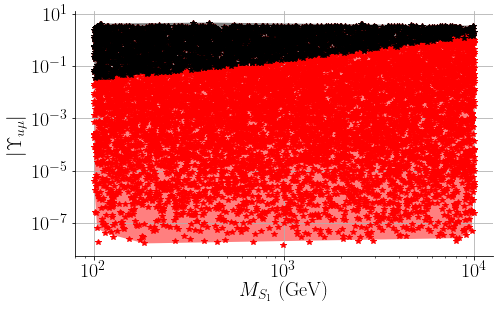

In [26]:

plt.plot(Data_coups['mS1'], Data_coups['Upsilon_abs'], '*r')
plt.plot(Data_excluded['mS1'], Data_excluded['Upsilon_abs'], '*k')
plt.fill(points_excl[hull_excl.vertices,0], points_excl[hull_excl.vertices,1], 'k', alpha=0.5)
plt.fill(points_allowed[hull_allowed.vertices,0], points_allowed[hull_allowed.vertices,1], 'r', alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$M_{S_1}~\mathrm{(GeV)}$')
plt.ylabel(r'$|\Upsilon_{u\mu}|$')



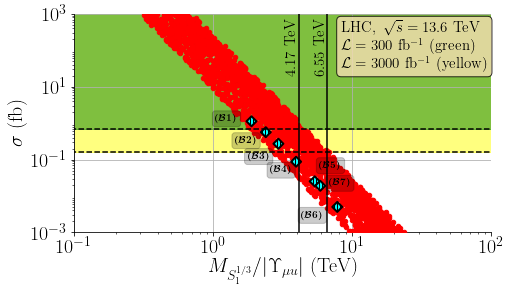

In [27]:
Data_coups['Coup_Mass'] = (Data_coups['mS1']*1e-3)/Data_coups['Upsilon_abs']

fig, ax = plt.subplots()

#Benchmarks
#Benchmark points 5.5 and 3.5 overlap. That's so convenient !

df1 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_1p5TeV.csv", sep = ','); xsec_1 = df1['xs_weight'].sum()*1000
df2 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_2p5TeV.csv", sep = ','); xsec_2 = df2['xs_weight'].sum()*1000
df3 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_3p5TeV.csv", sep = ','); xsec_3 = df3['xs_weight'].sum()*1000
df4 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_4p5TeV.csv", sep = ','); xsec_4 = df4['xs_weight'].sum()*1000
df5 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_5p5TeV.csv", sep = ','); xsec_5 = df5['xs_weight'].sum()*1000
df6 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_6p5TeV.csv", sep = ','); xsec_6 = df6['xs_weight'].sum()*1000
df7 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_7p5TeV.csv", sep = ','); xsec_7 = df7['xs_weight'].sum()*1000

plt.scatter((Data_1p5TeV['mS1']*1e-3)/(np.abs(0.7929+0.1443*1j)), xsec_1, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_2p5TeV['mS1']*1e-3)/(np.abs(0.311+0.965*1j)), xsec_2, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_3p5TeV['mS1']*1e-3)/(np.abs(1.128+0.27*1j)), xsec_3, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_4p5TeV['mS1']*1e-3)/(np.abs(1.035+0.421*1j)), xsec_4, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_5p5TeV['mS1']*1e-3)/(np.abs(0.701+0.773*1j)), xsec_5, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_6p5TeV['mS1']*1e-3)/(np.abs(0.7528+0.3372*1j)), xsec_6, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_7p5TeV['mS1']*1e-3)/(np.abs(1.177+0.526*1j)), xsec_7, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)

plt.text((Data_1p5TeV['mS1']*1e-3)/(np.abs(0.7929+0.1443*1j))*0.55, xsec_1, r"$\bm{(\mathcal{B}1)}$", fontsize = 10, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text((Data_2p5TeV['mS1']*1e-3)/(np.abs(0.311+0.965*1j))*0.60, xsec_2*0.5, r"$\bm{(\mathcal{B}2)}$", fontsize = 10, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text((Data_3p5TeV['mS1']*1e-3)/(np.abs(1.128+0.27*1j))*0.60, xsec_3*0.38, r"$\bm{(\mathcal{B}3)}$", fontsize = 10, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text((Data_4p5TeV['mS1']*1e-3)/(np.abs(1.035+0.421*1j))*0.65, xsec_4*0.5, r"$\bm{(\mathcal{B}4)}$", fontsize = 10, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text((Data_5p5TeV['mS1']*1e-3)/(np.abs(0.701+0.773*1j))*1.08, xsec_5*2.30, r"$\bm{(\mathcal{B}5)}$", fontsize = 10, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text((Data_6p5TeV['mS1']*1e-3)/(np.abs(0.7528+0.3372*1j))*0.55, xsec_6*0.5, r"$\bm{(\mathcal{B}6)}$", fontsize = 10, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))
plt.text((Data_7p5TeV['mS1']*1e-3)/(np.abs(1.177+0.526*1j))*1.15, xsec_7, r"$\bm{(\mathcal{B}7)}$", fontsize = 10, bbox=dict(boxstyle='round', facecolor='black', alpha=0.2))

plt.plot(Data_coups['Coup_Mass'], Data_coups['xsec_TChannel (fb)'], 'or', zorder=3, markersize=4.5)
Limit_HL = 0.16291*np.ones(100)
Limit_RUNIII = 0.70*np.ones(100)
plt.plot(np.linspace(Data_coups['Coup_Mass'].min(), Data_coups['Coup_Mass'].max(), 100), Limit_HL, '--k', zorder=5)
plt.fill_between(np.linspace(Data_coups['Coup_Mass'].min(), Data_coups['Coup_Mass'].max(), 100), Limit_HL, Data_coups['xsec_TChannel (fb)'].max()*np.ones(100), alpha=0.5, color='yellow')

plt.plot(np.linspace(Data_coups['Coup_Mass'].min(), Data_coups['Coup_Mass'].max(), 100), Limit_RUNIII, '--k', zorder=5)
plt.fill_between(np.linspace(Data_coups['Coup_Mass'].min(), Data_coups['Coup_Mass'].max(), 100), Limit_RUNIII, Data_coups['xsec_TChannel (fb)'].max()*np.ones(100), alpha=0.5, color='green')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.64, 0.75, '$\mathrm{{LHC}},~\sqrt{{s}} = 13.6~\mathrm{{TeV}}$ \n $\mathcal{{L}}={l1}~\mathrm{{fb^{{-1}}}}~\mathrm{{(green)}}$ \n $\mathcal{{L}}={l2}~\mathrm{{fb^{{-1}}}}~\mathrm{{(yellow)}}$'.format(l1=int(300.), l2=int(3000.)),
         transform=plt.gca().transAxes, bbox=props, fontsize=15., zorder=6)

rIII_mcp = (Data_coups.loc[(Data_coups['xsec_TChannel (fb)'] > 0.70)])['Coup_Mass'].max()*np.ones(100)
HL_mcp = (Data_coups.loc[(Data_coups['xsec_TChannel (fb)'] > 0.16291)])['Coup_Mass'].max()*np.ones(100)

xsec_mcp = np.linspace(1e-3, 1e3, 100)
xsec_mcp = np.linspace(1e-3, 1e3, 100)

plt.plot(rIII_mcp, xsec_mcp, '-k', zorder=5)
plt.plot(HL_mcp, xsec_mcp, '-k', zorder=5)
plt.text(3.25, 2.2e1, r"$4.17~\mathrm{TeV}$", rotation=90, fontsize = 15)
plt.text(5.30, 2.2e1, r"$6.55~\mathrm{TeV}$", rotation=90, fontsize = 15)

plt.yscale('log')
plt.xscale('log')
plt.grid()
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
#plt.ylim(Data_coups['xsec_TChannel (fb)'].min(), Data_coups['xsec_TChannel (fb)'].max())
plt.ylim(1e-3, 1e3)
plt.xlim(1e-1, 1e2)
plt.xlabel(r'$M_{S_1^{1/3}}/|\Upsilon_{\mu u}|~\mathrm{(TeV)}$')
plt.ylabel(r'$\sigma~(\mathrm{fb})$')
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/MassRatio_excl.pdf')
#plt.show()


In [28]:
xsec_3*0.2

0.05442867900000006

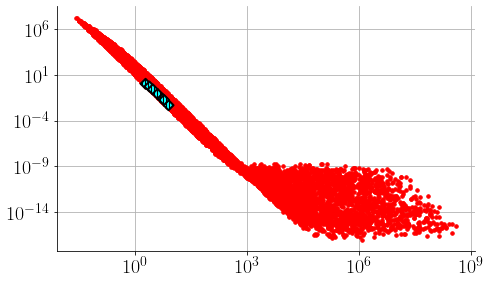

In [29]:
df1 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_1p5TeV.csv", sep = ','); xsec_1 = df1['xs_weight'].sum()*1000
df2 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_2p5TeV.csv", sep = ','); xsec_2 = df2['xs_weight'].sum()*1000
df3 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_3p5TeV.csv", sep = ','); xsec_3 = df3['xs_weight'].sum()*1000
df4 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_4p5TeV.csv", sep = ','); xsec_4 = df4['xs_weight'].sum()*1000
df5 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_5p5TeV.csv", sep = ','); xsec_5 = df5['xs_weight'].sum()*1000
df6 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_6p5TeV.csv", sep = ','); xsec_6 = df6['xs_weight'].sum()*1000
df7 = pd.read_csv("/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Full_data/Correct_weights/LQ_Tchannel_7p5TeV.csv", sep = ','); xsec_7 = df7['xs_weight'].sum()*1000

plt.scatter((Data_1p5TeV['mS1']*1e-3)/(np.abs(0.7929+0.1443*1j)), xsec_1, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_2p5TeV['mS1']*1e-3)/(np.abs(0.311+0.965*1j)), xsec_2, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_3p5TeV['mS1']*1e-3)/(np.abs(1.128+0.27*1j)), xsec_3, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_4p5TeV['mS1']*1e-3)/(np.abs(1.035+0.421*1j)), xsec_4, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_5p5TeV['mS1']*1e-3)/(np.abs(0.701+0.773*1j)), xsec_5, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_6p5TeV['mS1']*1e-3)/(np.abs(0.7528+0.3372*1j)), xsec_6, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)
plt.scatter((Data_7p5TeV['mS1']*1e-3)/(np.abs(1.177+0.526*1j)), xsec_7, marker = "D", color='cyan', edgecolor='black', hatch = '||||', s=50, linewidth=2.0, zorder=4)

plt.plot(Data_coups['Coup_Mass'], Data_coups['xsec_TChannel (fb)'], 'or', zorder=3, markersize=3.5)

plt.yscale('log')
plt.xscale('log')
plt.grid()

In [30]:
#Limit for HL-LHC
Data_coups_excl = Data_coups.loc[(Data_coups['xsec_TChannel (fb)'] > 0.16291)]
print("Limit:", Data_coups_excl['Coup_Mass'].max(), "TeV")

#Limit for run-III
Data_coups_excl = Data_coups.loc[(Data_coups['xsec_TChannel (fb)'] > 0.70)]
print("Limit:", Data_coups_excl['Coup_Mass'].max(), "TeV")


Limit: 6.551394090898647 TeV
Limit: 4.171082351497467 TeV


In [31]:
print("B1 ratio:", (Data_1p5TeV['mS1']*1e-3)/(np.abs(0.7929+0.1443*1j)), "\n")
print("B2 ratio:", (Data_2p5TeV['mS1']*1e-3)/(np.abs(0.311+0.965*1j)), "\n")
print("B3 ratio:", (Data_3p5TeV['mS1']*1e-3)/(np.abs(1.128+0.27*1j)), "\n")
print("B4 ratio:", (Data_4p5TeV['mS1']*1e-3)/(np.abs(1.035+0.421*1j)), "\n")
print("B5 ratio:", (Data_5p5TeV['mS1']*1e-3)/(np.abs(0.701+0.773*1j)), "\n")
print("B6 ratio:", (Data_6p5TeV['mS1']*1e-3)/(np.abs(0.7528+0.3372*1j)), "\n")
print("B7 ratio:", (Data_7p5TeV['mS1']*1e-3)/(np.abs(1.177+0.526*1j)), "\n")

B1 ratio: 16043    1.885052
Name: mS1, dtype: float64 

B2 ratio: 3526    2.388829
Name: mS1, dtype: float64 

B3 ratio: 1716    2.942962
Name: mS1, dtype: float64 

B4 ratio: 756    3.94469
Name: mS1, dtype: float64 

B5 ratio: 3691    5.363011
Name: mS1, dtype: float64 

B6 ratio: 195    7.794626
Name: mS1, dtype: float64 

B7 ratio: 3677    5.884506
Name: mS1, dtype: float64 

